In [111]:
from sklearn.cluster import KMeans
import numpy as np
import math
import matplotlib.pyplot as plt

In [112]:
CURR_GRAPH="curr_graph.txt"
CURR_INDS="curr_inds.txt"
KMeansClusterCenters="km_centres.txt"
KMeansLabels="k_labels.txt"
KM_INDS="kmeans_inds.txt"
SGMT='./segment.txt'
CNTRDS="./centroids.txt"
MAX=250

In [113]:
G=np.loadtxt(CURR_GRAPH,dtype='float')
x=G[:,0]
y=G[:,1]

I=np.loadtxt(CURR_INDS,dtype='float')
x0=I[:,0]
y0=I[:,1]

H=np.loadtxt(SGMT,dtype='float')
C=np.loadtxt(CNTRDS,dtype='float')

In [114]:
count_in=math.floor(MAX*0.1)
#kmeans=KMeans(n_clusters=count_in,n_init=MAX*10).fit(G)
kmeans=KMeans(n_clusters=count_in,init=I,n_init=1).fit(G)

In [115]:
# to be used as root[] in src.c
np.savetxt(KMeansLabels,kmeans.labels_,fmt='%d')
# to be used as ax[], ay[] in src.c
np.savetxt(KMeansClusterCenters,kmeans.cluster_centers_,fmt='%.7f')

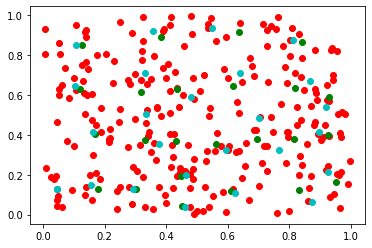

In [117]:
#segment nodes
x1=H[:,0]
y1=H[:,1]

#centroids
x2=C[:,0]
y2=C[:,1]

#kmeans cluster centers
KI=kmeans.cluster_centers_
x3=KI[:,0]
y3=KI[:,1]

#kmeans inds
K=np.loadtxt(KM_INDS,dtype='float')
x4=K[:,0]
y4=K[:,1]

plt.plot(x,y,'ro') #graph nodes
#plt.plot(x1,y1,'bo') #segment nodes
#plt.plot(x0,y0,'yo') #partition inds
plt.plot(x2,y2,'go') #partition centroids
plt.plot(x3,y3,'co') #kmeans cluster centers
#plt.plot(x4,y4,'mo') #kmeans inds 
plt.show()